In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
df = pd.read_csv("../csv/feedback-v2.csv")
df.columns = df.columns.str.strip()

In [3]:
new_columns = {
    'Qual seu nível de conhecimento sobre tipos de estudos experimentais (primários, secundários e terciários) antes da disciplina?': 'Experimental studies (before)',
    'Qual seu nível de conhecimento sobre experimento controlado antes da disciplina?': 'Controlled experiment (before)',
    'Qual seu nível de conhecimento sobre estudo de caso antes da disciplina?': 'Case study (before)',
    'Qual seu nível de conhecimento sobre Survey antes da disciplina?': 'Survey (before)',
    'Qual seu nível de conhecimento sobre análise estatística de experimentos antes da disciplina?': 'Statistical analysis of experiments (before)',
    'Qual seu nível de conhecimento sobre análise qualitativa antes da disciplina?': 'Qualitative analysis (before)',
    'Qual seu nível de conhecimento sobre revisão sistemática da literatura (RSL) antes da disciplina?': 'S.L.R (before)',  # Systematic Literature Review
    'Qual seu nível de conhecimento sobre tipos de estudos experimentais (primários, secundários e terciários) após da disciplina?': 'Experimental studies (after)',
    'Qual seu nível de conhecimento sobre experimento controlado após a disciplina?': 'Controlled experiment (after)',
    'Qual seu nível de conhecimento sobre estudo de caso após a disciplina?': 'Case study (after)',
    'Qual seu nível de conhecimento sobre Survey após a disciplina?': 'Survey (after)',
    'Qual seu nível de conhecimento sobre análise estatística de experimentos após a disciplina?': 'Statistical analysis of experiments (after)',
    'Qual seu nível de conhecimento sobre análise qualitativa após a disciplina?': 'Qualitative analysis (after)',
    'Qual seu nível de conhecimento sobre revisão sistemática da literatura (RSL) após a disciplina?': 'S.L.R (after)'
}

In [6]:
df = df[list(new_columns.keys())].rename(columns=new_columns)

In [7]:
methods = {
    "Experimental studies": (
        "Experimental studies (before)",
        "Experimental studies (after)"
    ),
    "Controlled experiment": (
        "Controlled experiment (before)",
        "Controlled experiment (after)"
    ),
    "Case study": (
        "Case study (before)",
        "Case study (after)"
    ),
    "Survey": (
        "Survey (before)",
        "Survey (after)"
    ),
    "Statistical analysis of experiments": (
        "Statistical analysis of experiments (before)",
        "Statistical analysis of experiments (after)"
    ),
    "Qualitative analysis": (
        "Qualitative analysis (before)",
        "Qualitative analysis (after)"
    ),
    "S.L.R": (
        "S.L.R (before)",
        "S.L.R (after)"
    )
}

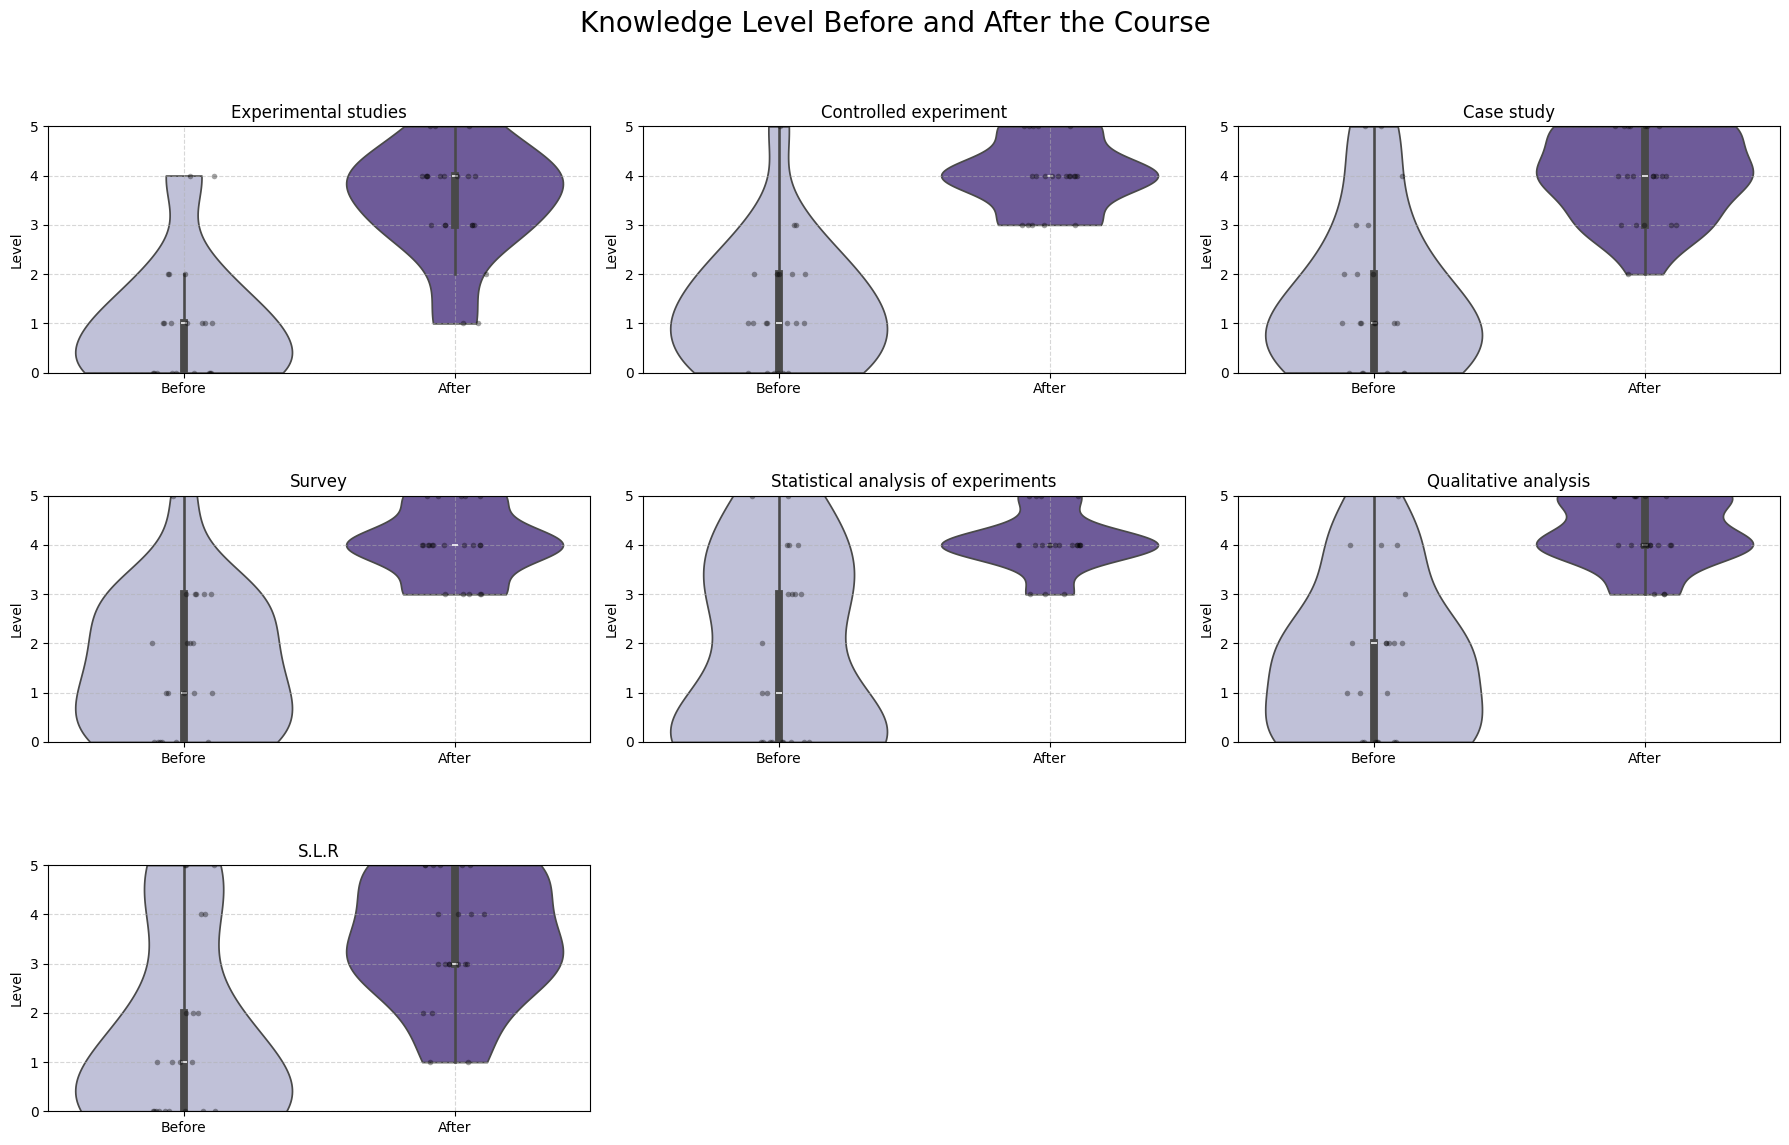

In [14]:
# Para melhorar a visualização e evitar excesso de outliers aparentes nos boxplots,
# podemos não usar jitter no boxplot, e sim adicionar violinplots suavizando a distribuição,
# e sobrepor stripplots com jitter leve apenas como reforço visual, sem afetar as estatísticas do boxplot.
# O resultado é mais natural e menos poluído de "outliers falsos".

import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for index, (metodo, (antes, depois)) in enumerate(methods.items()):
    dados_plot = pd.DataFrame({
        'Knowledge': pd.concat([df[antes], df[depois]], ignore_index=True), 
        'Time': ['Before'] * len(df) + ['After'] * len(df) 
    })

    # Violinplot traz visualização de densidade mais suave
    sns.violinplot(
        x='Time', y='Knowledge', data=dados_plot,
        palette=['#bcbddc','#6a51a3'], hue='Time', split=False, inner="box",
        ax=axes[index], dodge=False, cut=0
    )

    # Stripplot mostra pontos individuais com jitter leve (apenas visual)
    sns.stripplot(
        x='Time', y='Knowledge', data=dados_plot,
        color='k', size=4, jitter=0.12, ax=axes[index], dodge=False, alpha=0.36
    )

    # Ajustes visuais
    axes[index].set_title(f"{metodo.split('-')[-1].strip()}")
    axes[index].set_ylim(0, 5)
    axes[index].set_ylabel('Level')
    axes[index].set_xlabel('')
    axes[index].grid(True, linestyle="--", alpha=0.5)

    # Ajustar legenda para não duplicar "Time" por conta do violinplot
    legend = axes[index].get_legend()
    if legend:
        handles, labels = axes[index].get_legend_handles_labels()
        axes[index].legend(handles[:2], ['Before', 'After'], title='Time')

for j in range(len(methods), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Knowledge Level Before and After the Course', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.5)
plt.show()